## Results and evaluation

In [2]:
import os
import numpy as np
import pandas as pd
import dateutil as dt
from sklearn import metrics
import json

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import notebook_utils

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
groups = ['unseen', 'embeddings', 'nonselected']

In [5]:
link_refs = {}
for group in groups:
    with open(f'../output/links_{group}.txt') as f:
        link_refs_ = f.readlines()
        link_refs[group] = list(filter(lambda x: not x.startswith('#'), [x.strip() for x in link_refs_]))

In [6]:
#times = ['20190408']
times = ['20190415']

In [52]:
results = []
hyperparameters = []
models = ['baseline_nn', 'baseline_sunday', 'baseline_replicate_last_year', 'day_type_embeddings']
#models = ['baseline_nn']
#models = ['day_type_embeddings']

for model in models:
    for group in groups:
        for link_ref in link_refs[group]:
            link_ref_slug = link_ref.replace(':', '-')    
            output_directory = f'../output/{model}/{group}/{link_ref_slug}'
            for time in times:
                try:
                    time_slug = time # time.date().isoformat().replace('-', '')                
                    #train = pd.read_csv(f'{output_directory}/train_{time_slug}.csv', index_col = 0)
                    test = pd.read_csv(f'{output_directory}/test_{time_slug}.csv', index_col = 0)
                    #hist = pd.read_csv(f'{output_directory}/hist_{time_slug}.csv', index_col = 0)

                    results.append({
                        'link_ref': link_ref,
                        'time': time,
                        'model': model,
                        'group': group,
                        'test_mean_absolute_error': metrics.mean_absolute_error(test['link_travel_time_exp'], test[model]),
                        'test_root_mean_squared_error': np.sqrt(metrics.mean_squared_error(test['link_travel_time_exp'], test[model])),
                        #'train_mean_absolute_error': metrics.mean_absolute_error(train['link_travel_time_exp'], train[model]),                        
                        #'train_root_mean_squared_error': np.sqrt(metrics.mean_squared_error(train['link_travel_time_exp'], train[model]))
                        'N': test['link_travel_time_exp'].count()
                    })
                except Exception as e:
                    print(f'Failed to add {model} / {link_ref} / {time}', e)
                    pass

            if model in ['baseline_sunday']:
                continue
                
            try:
                with open(f'{output_directory}/hyperparameters.json') as f:
                    model_hyperparameters = json.load(f)['values']
                model_hyperparameters['link_ref'] = link_ref
                model_hyperparameters['model'] = model
                model_hyperparameters['group'] = group
                hyperparameters.append(model_hyperparameters)
            except Exception as e:
                print(f'Failed to add {model} / {link_ref} / {time}', e)
                pass

results = pd.DataFrame(results)

hyperparameters = pd.DataFrame(hyperparameters).drop(['tuner/bracket', 'tuner/epochs', 'tuner/initial_epoch', 'tuner/round', 'tuner/trial_id'], axis = 1)
#hyperparameters.loc[hyperparameters['num_layers'] < 3, 'units_3'] = 0
#hyperparameters.loc[hyperparameters['num_layers'] < 2, 'units_2'] = 0

Failed to add baseline_replicate_last_year / 1015:850 / 20190415 [Errno 2] File ../output/baseline_replicate_last_year/unseen/1015-850/test_20190415.csv does not exist: '../output/baseline_replicate_last_year/unseen/1015-850/test_20190415.csv'
Failed to add baseline_replicate_last_year / 1015:850 / 20190415 [Errno 2] No such file or directory: '../output/baseline_replicate_last_year/unseen/1015-850/hyperparameters.json'
Failed to add baseline_replicate_last_year / 1022:840 / 20190415 [Errno 2] File ../output/baseline_replicate_last_year/unseen/1022-840/test_20190415.csv does not exist: '../output/baseline_replicate_last_year/unseen/1022-840/test_20190415.csv'
Failed to add baseline_replicate_last_year / 1022:840 / 20190415 [Errno 2] No such file or directory: '../output/baseline_replicate_last_year/unseen/1022-840/hyperparameters.json'
Failed to add baseline_replicate_last_year / 1024:1025 / 20190415 [Errno 2] File ../output/baseline_replicate_last_year/unseen/1024-1025/test_20190415.c

In [56]:
results.groupby('link_ref')['N'].max().sum()

12356

In [44]:
hyperparameters.set_index(['group', 'model', 'link_ref'])

dropout  num_layers  fc_1_units  \
group       model               link_ref                                       
unseen      baseline_nn         1015:850         0.1           2         350   
                                1022:840         0.0           2         200   
                                1024:1025        0.1           1         200   
                                10842:719        0.0           2         200   
                                1112:2338        0.2           2         350   
                                1193:2666        0.2           1         100   
                                1220:1221        0.2           2         400   
                                1305:5490        0.2           2         450   
                                133:6485         0.0           2         200   
                                1417:27686       0.0           3         500   
embeddings  baseline_nn         1015:850         0.0           2         200   
                                1022:840         0.1           3         300   
                                1024:1025        0.2           3         350   
                                10842:719        0.2           2         400   
                                1112:2338        0.1           1         150   
                                1193:2666        0.2           1         100   
                                1220:1221        0.2           1         100   
                                1305:5490        0.1           2         400   
                                133:6485         0.2           2         400   
                                1417:27686       0.0           3         500   
nonselected baseline_nn         1099:1100        0.2           2         400   
                                1527:1528        0.2           2         350   
                                1528:2303        0.1           1         150   
                                1601:1602        0.1           3         300   
                                27527:27541      0.0           2         200   
                                4493:2334        0.2           2         350   
                                10593:10594      0.0           2         200   
                                1179:1180        0.0           2         200   
                                1247:1248        0.2           2         400   
                                1968:2151        0.2           1         100   
unseen      day_type_embeddings 1015:850         0.0           1         450   
                                1022:840         0.2           1         300   
                                1024:1025        0.0           1         350   
                                10842:719        0.0           2         300   
                                1112:2338        0.0           1         300   
                                1193:2666        0.1           1         350   
                                1220:1221        0.1           1         350   
                                1305:5490        0.1           2         150   
                                133:6485         0.0           1         300   
                                1417:27686       0.2           1         300   
embeddings  day_type_embeddings 1015:850         0.0           2         450   
                                1022:840         0.1           1         350   
                                1024:1025        0.1           2         300   
                                10842:719        0.0           1         350   
                                1112:2338        0.1           2         200   
                                1193:2666        0.2           1         300   
                                1220:1221        0.0           1         300   
                                1305:5490        0.0           1         450   
                                133:6485     

In [46]:
results.groupby(['model', 'group'])['test_root_mean_squared_error'].mean().unstack(1).style.apply(notebook_utils.highlight_min, axis = 0).format("{:0.1f}")

group,embeddings,nonselected,unseen
model,,,
baseline_nn,13.2,5.6,13.3
baseline_replicate_last_year,9.5,9.4,nan
baseline_sunday,16.8,6.7,16.8
day_type_embeddings,9.9,5.0,10.9


In [47]:
print(results.groupby(['model', 'group'])['test_root_mean_squared_error'].mean().unstack(1).round(1).to_latex())

\begin{tabular}{lrrr}
\toprule
group &  embeddings &  nonselected &  unseen \\
model                        &             &              &         \\
\midrule
baseline\_nn                  &        13.2 &          5.6 &    13.3 \\
baseline\_replicate\_last\_year &         9.5 &          9.4 &     NaN \\
baseline\_sunday              &        16.8 &          6.7 &    16.8 \\
day\_type\_embeddings          &         9.9 &          5.0 &    10.9 \\
\bottomrule
\end{tabular}



In [48]:
results.groupby(['model', 'group'])['test_mean_absolute_error'].mean().unstack(1).style.apply(notebook_utils.highlight_min, axis = 0).format("{:0.1f}")

group,embeddings,nonselected,unseen
model,,,
baseline_nn,9.7,4.3,10.1
baseline_replicate_last_year,7.4,8.2,nan
baseline_sunday,12.4,5.0,12.4
day_type_embeddings,7.9,3.9,8.9


In [49]:
print(results.groupby(['model', 'group'])['test_mean_absolute_error'].mean().unstack(1).round(1).to_latex())

\begin{tabular}{lrrr}
\toprule
group &  embeddings &  nonselected &  unseen \\
model                        &             &              &         \\
\midrule
baseline\_nn                  &         9.7 &          4.3 &    10.1 \\
baseline\_replicate\_last\_year &         7.4 &          8.2 &     NaN \\
baseline\_sunday              &        12.4 &          5.0 &    12.4 \\
day\_type\_embeddings          &         7.9 &          3.9 &     8.9 \\
\bottomrule
\end{tabular}



Overfitting:
1217:1218
53095:23

In [14]:
group = groups[1]
link_ref = link_refs[group][0]
link_ref_slug = link_ref.replace(':', '-')    

train = pd.DataFrame(columns=['link_travel_time', 'link_travel_time_exp']) 
test = pd.DataFrame()
hp_hist = pd.DataFrame(index = np.arange(99) + 1)
hist = pd.DataFrame(index = np.arange(99) + 1)

for model in models:
    output_directory = f'../output/{model}/{group}/{link_ref_slug}'
    if os.path.exists(f'{output_directory}/train_{time_slug}.csv'):
        train_ = pd.read_csv(f'{output_directory}/train_{time_slug}.csv', index_col = 0, parse_dates=True)
        train_ = train_.loc[~train_.index.duplicated(keep='first')]
        train = train.join(train_[model], how='outer')
        train.loc[train_.index, 'link_travel_time'] = train_['link_travel_time']
        train.loc[train_.index, 'link_travel_time_exp'] = train_['link_travel_time_exp']
        
    test_ = pd.read_csv(f'{output_directory}/test_{time_slug}.csv', index_col = 0, parse_dates=True)
    if not 'link_travel_time_exp' in test.columns and 'link_travel_time_exp' in test_.columns:
        test['link_travel_time_exp'] = test_['link_travel_time_exp']
    test[model] = test_[model]
    
    if os.path.exists(f'{output_directory}/hp_hist_{time_slug}.csv'):
        hp_hist[model + '_loss'] = pd.read_csv(f'{output_directory}/hp_hist_{time_slug}.csv', index_col = 0)['loss']
        hp_hist[model + '_val_loss'] = pd.read_csv(f'{output_directory}/hp_hist_{time_slug}.csv', index_col = 0)['val_loss']
    if os.path.exists(f'{output_directory}/hist_{time_slug}.csv'):
        hist[model + '_loss'] = pd.read_csv(f'{output_directory}/hist_{time_slug}.csv', index_col = 0)['loss']
        hist[model + '_val_loss'] = pd.read_csv(f'{output_directory}/hist_{time_slug}.csv', index_col = 0)['val_loss']
    
#hp_hist = hp_hist.dropna(how='all')
#hist = hist.dropna(how='all')

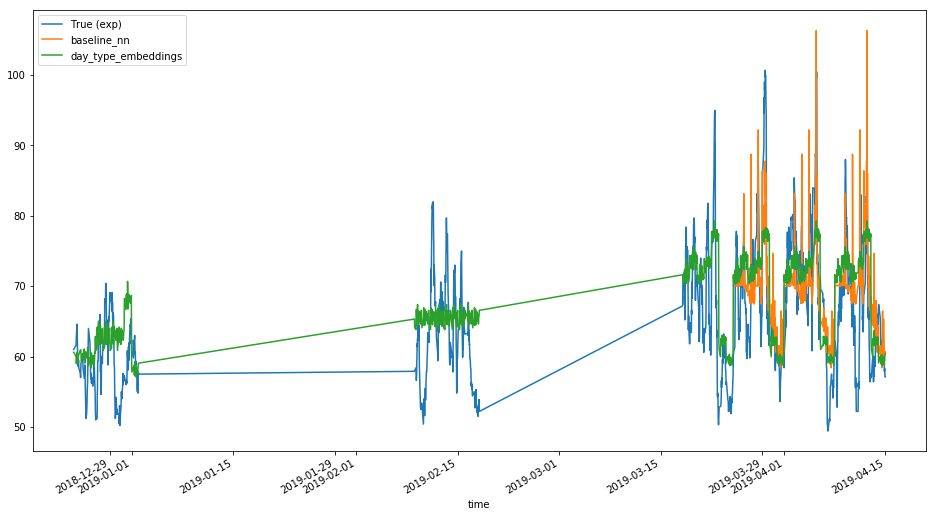

In [15]:
fig, ax = plt.subplots(figsize = (16, 9))
train['link_travel_time_exp'].plot(ax = ax, label = 'True (exp)')
for model in models:
    #notebook_utils.smooth_align_df(test[[model]], freq = '5min', smooth=50).plot(ax = ax)
    if model in train.columns:
        train[model].plot(ax = ax)
ax.legend()

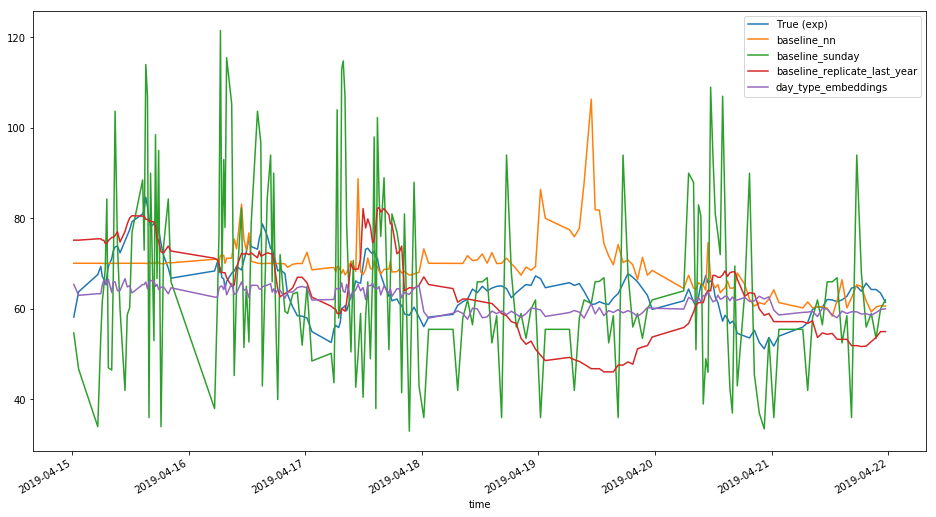

In [16]:
fig, ax = plt.subplots(figsize = (16, 9))
test['link_travel_time_exp'].plot(ax = ax, label = 'True (exp)')
for model in models:
    #notebook_utils.smooth_align_df(test[[model]], freq = '5min', smooth=50).plot(ax = ax)
    test[model].plot(ax = ax)
ax.legend()

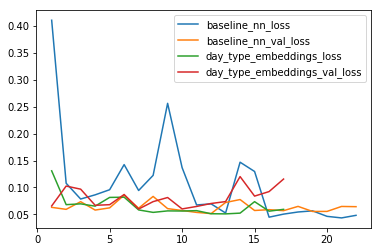

In [17]:
hp_hist.plot()

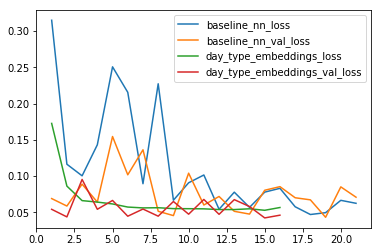

In [18]:
hist.plot()